In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
dice_results_540 = pd.read_csv("/home/feczk001/shared/data/nnUNet/540_results/dice/dice.csv")
dice_results_540

,subject,3rd-Ventricle,4th-Ventricle,Brain-Stem,CSF,Vermis,Left-Cerebral-White-Matter,Left-Cerebral-Cortex,Left-Lateral-Ventricle,Left-Cerebellum-Cortex,...,Right-Lateral-Ventricle,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
0,0mo_sub-107528.nii.gz,0.851613,0.914573,0.971646,0.000000,0.944539,0.954510,0.933160,0.877379,0.943841,...,0.870960,0.936475,0.969813,0.920635,0.942610,0.919226,0.909260,0.945455,0.903766,0.929889
1,0mo_sub-145203.nii.gz,0.906449,0.901961,0.967618,0.000000,0.898178,0.960783,0.942215,0.932729,0.933407,...,0.923596,0.949061,0.967423,0.942792,0.952442,0.966499,0.921397,0.922951,0.921788,0.922293
2,0mo_sub-154099.nii.gz,0.814815,0.902022,0.959674,0.000000,0.931056,0.917958,0.867159,0.850911,0.920180,...,0.876514,0.933802,0.956530,0.936832,0.940080,0.942092,0.868757,0.888241,0.885714,0.771863
3,0mo_sub-231094.nii.gz,0.888889,0.905089,0.964424,0.000000,0.951162,0.955411,0.935139,0.889874,0.946736,...,0.869504,0.948560,0.943685,0.952168,0.948787,0.912713,0.930424,0.915758,0.869919,0.912147
4,0mo_sub-231265.nii.gz,0.907273,0.909774,0.958886,0.000000,0.946136,0.950178,0.932543,0.921176,0.954696,...,0.914273,0.941970,0.961808,0.940142,0.951125,0.929897,0.889175,0.942014,0.880282,0.920874
5,0mo_sub-314566.nii.gz,0.871264,0.914923,0.958253,0.000000,0.933913,0.959596,0.932615,0.896067,0.907468,...,0.897190,0.915473,0.961968,0.942987,0.959876,0.941079,0.928418,0.936634,0.953846,0.877896
6,0mo_sub-387471.nii.gz,0.827160,0.881020,0.971175,0.000000,0.944386,0.959249,0.934616,0.875619,0.944431,...,0.860697,0.934560,0.959062,0.942460,0.942043,0.897196,0.906631,0.913621,0.867299,0.897436
7,0mo_sub-396706.nii.gz,0.925714,0.932600,0.963029,0.000000,0.953577,0.961683,0.946033,0.886111,0.939143,...,0.876742,0.940144,0.961582,0.931924,0.954176,0.939450,0.924299,0.959432,0.874618,0.841026
8,1mo_sub-116400.nii.gz,0.816754,0.909984,0.969296,0.000000,0.944806,0.958692,0.939947,0.894569,0.955245,...,0.877177,0.954005,0.960700,0.958107,0.958846,0.944601,0.911862,0.932927,0.889830,0.915175
9,1mo_sub-156492.nii.gz,0.911092,0.907354,0.970556,0.000000,0.937376,0.887352,0.862655,0.893959,0.965326,...,0.922319,0.953809,0.949376,0.910418,0.914069,0.861314,0.894495,0.896359,0.864516,0.872464


In [3]:
dice_results_542 = pd.read_csv("/home/faird/shared/data/nnUNet_lundq163/542_results/dice/dice.csv")
dice_results_542

,subject,3rd-Ventricle,4th-Ventricle,Brain-Stem,CSF,Vermis,Left-Cerebral-White-Matter,Left-Cerebral-Cortex,Left-Lateral-Ventricle,Left-Cerebellum-Cortex,...,Right-Lateral-Ventricle,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
0,0mo_sub-107528.nii.gz,0.875758,0.932432,0.951121,0.000000,0.943323,0.950593,0.926247,0.881954,0.922083,...,0.899770,0.924000,0.965106,0.932483,0.934458,0.900881,0.909173,0.949425,0.877358,0.923792
1,0mo_sub-118091.nii.gz,0.872449,0.899687,0.960074,0.000000,0.951437,0.962762,0.948949,0.931800,0.935923,...,0.921608,0.927594,0.944417,0.918427,0.871783,0.833593,0.910523,0.908180,0.884210,0.698876
2,0mo_sub-123208.nii.gz,0.875587,0.910160,0.961532,0.000000,0.918722,0.958617,0.945674,0.894790,0.943615,...,0.903399,0.933120,0.965373,0.925174,0.943753,0.903670,0.894647,0.943599,0.818565,0.921406
3,0mo_sub-125504.nii.gz,0.931343,0.877250,0.949442,0.000000,0.940484,0.953862,0.916661,0.894722,0.929781,...,0.869613,0.937411,0.957698,0.915121,0.950255,0.914838,0.908805,0.955696,0.748718,0.873635
4,0mo_sub-134449.nii.gz,0.923521,0.932584,0.966992,0.000000,0.951105,0.966207,0.951807,0.900705,0.935108,...,0.890122,0.939521,0.970943,0.927020,0.953312,0.930626,0.905485,0.951923,0.748466,0.941634
5,0mo_sub-145203.nii.gz,0.939024,0.907757,0.960373,0.000000,0.887935,0.958170,0.931080,0.911100,0.934142,...,0.898157,0.956998,0.951148,0.931555,0.942213,0.937040,0.896871,0.894176,0.825397,0.899873
6,0mo_sub-153860.nii.gz,0.891068,0.929577,0.952467,0.000000,0.940493,0.964329,0.948652,0.913031,0.960968,...,0.906240,0.962969,0.960593,0.948362,0.938304,0.901389,0.931174,0.929432,0.816176,0.927555
7,0mo_sub-154099.nii.gz,0.850816,0.853035,0.937313,0.000000,0.856546,0.910652,0.850845,0.835453,0.908458,...,0.857466,0.896243,0.944917,0.914135,0.919720,0.901763,0.890769,0.868217,0.750000,0.781841
8,0mo_sub-168064.nii.gz,0.919164,0.916327,0.939749,0.000000,0.920842,0.927089,0.898197,0.864791,0.950004,...,0.866607,0.941158,0.947562,0.924901,0.938550,0.912653,0.919583,0.892308,0.724138,0.862771
9,0mo_sub-175403.nii.gz,0.863747,0.890805,0.960899,0.000000,0.929328,0.963131,0.950163,0.868610,0.933526,...,0.851660,0.935995,0.947479,0.935456,0.951073,0.891505,0.898145,0.938628,0.852174,0.853157


In [4]:
dice_results_541 = pd.read_csv("/home/faird/shared/data/nnUNet_lundq163/541_results/dice/dice.csv")
dice_results_541

,subject,3rd-Ventricle,4th-Ventricle,Brain-Stem,CSF,Vermis,Left-Cerebral-White-Matter,Left-Cerebral-Cortex,Left-Lateral-Ventricle,Left-Cerebellum-Cortex,...,Right-Lateral-Ventricle,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
0,0mo_sub-107528.nii.gz,0.865533,0.882562,0.957949,0.000000,0.931072,0.923855,0.895498,0.824818,0.924646,...,0.860597,0.909781,0.957584,0.886681,0.908346,0.911894,0.909754,0.913242,0.869198,0.915989
1,0mo_sub-145203.nii.gz,0.872038,0.791946,0.936392,0.000000,0.873122,0.919416,0.892042,0.900678,0.916092,...,0.878775,0.909471,0.968434,0.919067,0.932782,0.938127,0.905151,0.903015,0.861878,0.914867
2,0mo_sub-154099.nii.gz,0.713436,0.659236,0.927107,0.000000,0.658287,0.616992,0.541789,0.506536,0.798214,...,0.503923,0.781063,0.842957,0.813910,0.828843,0.856646,0.756316,0.607467,0.546075,0.705656
3,0mo_sub-231094.nii.gz,0.872611,0.814815,0.924941,0.000000,0.883775,0.911384,0.885694,0.824386,0.926761,...,0.777931,0.889508,0.918153,0.904747,0.942842,0.921435,0.853012,0.896833,0.869198,0.900000
4,0mo_sub-231265.nii.gz,0.887630,0.904762,0.963521,0.000000,0.927563,0.926306,0.910629,0.877248,0.938618,...,0.891149,0.925682,0.957116,0.913283,0.942612,0.924797,0.867257,0.911619,0.857143,0.914157
5,0mo_sub-314566.nii.gz,0.872727,0.891813,0.947061,0.000000,0.892857,0.922994,0.884457,0.873816,0.860930,...,0.862960,0.863469,0.956200,0.919645,0.944061,0.937552,0.902197,0.879699,0.830769,0.849780
6,0mo_sub-387471.nii.gz,0.842857,0.845506,0.949805,0.000000,0.924184,0.904564,0.870807,0.853003,0.925371,...,0.817323,0.894122,0.946356,0.917119,0.914568,0.905630,0.876974,0.893688,0.845411,0.896907
7,0mo_sub-396706.nii.gz,0.918981,0.914773,0.942448,0.000000,0.913397,0.932331,0.910398,0.855915,0.916940,...,0.856661,0.912825,0.959384,0.899969,0.941423,0.960074,0.933499,0.947059,0.892405,0.822612
8,1mo_sub-116400.nii.gz,0.833876,0.919176,0.954890,0.000000,0.916157,0.923871,0.898434,0.879417,0.932246,...,0.854342,0.937725,0.958229,0.949534,0.942053,0.940741,0.911465,0.918974,0.895652,0.887290
9,1mo_sub-156492.nii.gz,0.879862,0.890640,0.953638,0.000000,0.929603,0.826638,0.797498,0.851540,0.943546,...,0.879509,0.909190,0.947849,0.857779,0.893099,0.816042,0.893240,0.846085,0.841772,0.854181


In [5]:
dice_results_600 = pd.read_csv("/home/faird/shared/data/nnUNet_lundq163/600_results/dice/dice.csv")
dice_results_600

,subject,3rd-Ventricle,4th-Ventricle,Brain-Stem,CSF,Vermis,Left-Cerebral-White-Matter,Left-Cerebral-Cortex,Left-Lateral-Ventricle,Left-Cerebellum-Cortex,...,Right-Lateral-Ventricle,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
0,0mo_sub-0000107528.nii.gz,0.885886,0.894737,0.950817,0.000000,0.933536,0.924826,0.898493,0.847909,0.919462,...,0.874850,0.906495,0.954424,0.873867,0.924343,0.912514,0.911898,0.913295,0.870690,0.918773
1,0mo_sub-0000145203.nii.gz,0.880975,0.791527,0.931713,0.000000,0.879665,0.921012,0.894077,0.922486,0.920176,...,0.899353,0.913471,0.963941,0.919944,0.929534,0.929648,0.900494,0.905439,0.850153,0.913208
2,0mo_sub-0000154099.nii.gz,0.742459,0.651968,0.924037,0.000000,0.627897,0.622741,0.545358,0.506651,0.801335,...,0.515635,0.778014,0.848159,0.816472,0.834458,0.849741,0.761429,0.616183,0.536232,0.713645
3,0mo_sub-0000231094.nii.gz,0.851735,0.830295,0.926567,0.000000,0.872011,0.910704,0.887526,0.842953,0.930322,...,0.789122,0.896763,0.927536,0.920169,0.941176,0.908184,0.857260,0.893004,0.827869,0.908949
4,0mo_sub-0000231265.nii.gz,0.894787,0.872727,0.955551,0.000000,0.944236,0.927971,0.911753,0.902995,0.938189,...,0.888704,0.929176,0.955993,0.928996,0.924484,0.911854,0.854045,0.918367,0.856031,0.904620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,7mo_sub-0001657158.nii.gz,0.902532,0.875258,0.947785,0.909492,0.000000,0.818301,0.872178,0.896027,0.950364,...,0.891658,0.932631,0.964957,0.907749,0.919860,0.902739,0.842345,0.905765,0.772655,0.945353
64,7mo_sub-0001682023.nii.gz,0.885381,0.870740,0.943013,0.878723,0.000000,0.820149,0.852722,0.881393,0.947022,...,0.883138,0.928403,0.959284,0.949559,0.907197,0.880088,0.905019,0.899072,0.823344,0.941029
65,8mo_sub-0000198202.nii.gz,0.927609,0.930123,0.951484,0.887048,0.000000,0.917017,0.931637,0.848485,0.957827,...,0.826667,0.956601,0.965931,0.944306,0.917418,0.913015,0.914358,0.904762,0.834327,0.940148
66,8mo_sub-0001518969.nii.gz,0.899194,0.827258,0.933618,0.775264,0.000000,0.817140,0.796830,0.783642,0.867750,...,0.751311,0.861074,0.954812,0.895870,0.889339,0.848565,0.862393,0.841856,0.717241,0.902766


In [6]:
comb_results = dice_results_540.merge(dice_results_541, how='outer', on='subject', suffixes=(None, "_t1only")).merge(dice_results_542, how='outer', on='subject', suffixes=(None, '_t2only')).merge(dice_results_600, how='outer', on='subject', suffixes=('_t1t2', '_unpaired'))
#comb_results = pd.concat([dice_results_540,dice_results_541,dice_results_542],axis=1,ignore_index=False)
comb_results

,subject,3rd-Ventricle_t1t2,4th-Ventricle_t1t2,Brain-Stem_t1t2,CSF_t1t2,Vermis_t1t2,Left-Cerebral-White-Matter_t1t2,Left-Cerebral-Cortex_t1t2,Left-Lateral-Ventricle_t1t2,Left-Cerebellum-Cortex_t1t2,...,Right-Lateral-Ventricle_unpaired,Right-Cerebellum-Cortex_unpaired,Right-Thalamus-Proper_unpaired,Right-Caudate_unpaired,Right-Putamen_unpaired,Right-Pallidum_unpaired,Right-Hippocampus_unpaired,Right-Amygdala_unpaired,Right-Accumbens-area_unpaired,Right-VentralDC_unpaired
0,0mo_sub-0000107528.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.874850,0.906495,0.954424,0.873867,0.924343,0.912514,0.911898,0.913295,0.870690,0.918773
1,0mo_sub-0000145203.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.899353,0.913471,0.963941,0.919944,0.929534,0.929648,0.900494,0.905439,0.850153,0.913208
2,0mo_sub-0000154099.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.515635,0.778014,0.848159,0.816472,0.834458,0.849741,0.761429,0.616183,0.536232,0.713645
3,0mo_sub-0000231094.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.789122,0.896763,0.927536,0.920169,0.941176,0.908184,0.857260,0.893004,0.827869,0.908949
4,0mo_sub-0000231265.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.888704,0.929176,0.955993,0.928996,0.924484,0.911854,0.854045,0.918367,0.856031,0.904620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,8mo_sub-0001518969.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.751311,0.861074,0.954812,0.895870,0.889339,0.848565,0.862393,0.841856,0.717241,0.902766
119,8mo_sub-0001552990.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.814271,0.925380,0.943408,0.915007,0.894686,0.843300,0.826913,0.816553,0.696456,0.902611
120,8mo_sub-198202.nii.gz,0.841406,0.866193,0.935143,0.8848,0.0,0.921737,0.938199,0.844131,0.95714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,8mo_sub-518969.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
comb_results.columns

Index(['subject', '3rd-Ventricle_t1t2', '4th-Ventricle_t1t2',
       'Brain-Stem_t1t2', 'CSF_t1t2', 'Vermis_t1t2',
       'Left-Cerebral-White-Matter_t1t2', 'Left-Cerebral-Cortex_t1t2',
       'Left-Lateral-Ventricle_t1t2', 'Left-Cerebellum-Cortex_t1t2',
       ...
       'Right-Lateral-Ventricle_unpaired', 'Right-Cerebellum-Cortex_unpaired',
       'Right-Thalamus-Proper_unpaired', 'Right-Caudate_unpaired',
       'Right-Putamen_unpaired', 'Right-Pallidum_unpaired',
       'Right-Hippocampus_unpaired', 'Right-Amygdala_unpaired',
       'Right-Accumbens-area_unpaired', 'Right-VentralDC_unpaired'],
      dtype='object', length=117)

In [9]:
comb_results_only_cortex = comb_results[['subject', 'Left-Cerebral-White-Matter_t1t2', 'Left-Cerebral-Cortex_t1t2', 'Right-Cerebral-White-Matter_t1t2', 'Right-Cerebral-Cortex_t1t2', 'Left-Cerebral-White-Matter_t1only', 'Left-Cerebral-Cortex_t1only', 'Right-Cerebral-White-Matter_t1only', 'Right-Cerebral-Cortex_t1only', 'Left-Cerebral-White-Matter_t2only', 'Left-Cerebral-Cortex_t2only', 'Right-Cerebral-White-Matter_t2only', 'Right-Cerebral-Cortex_t2only','Left-Cerebral-White-Matter_unpaired', 'Left-Cerebral-Cortex_unpaired', 'Right-Cerebral-White-Matter_unpaired', 'Right-Cerebral-Cortex_unpaired']]
comb_results_only_cortex

,subject,Left-Cerebral-White-Matter_t1t2,Left-Cerebral-Cortex_t1t2,Right-Cerebral-White-Matter_t1t2,Right-Cerebral-Cortex_t1t2,Left-Cerebral-White-Matter_t1only,Left-Cerebral-Cortex_t1only,Right-Cerebral-White-Matter_t1only,Right-Cerebral-Cortex_t1only,Left-Cerebral-White-Matter_t2only,Left-Cerebral-Cortex_t2only,Right-Cerebral-White-Matter_t2only,Right-Cerebral-Cortex_t2only,Left-Cerebral-White-Matter_unpaired,Left-Cerebral-Cortex_unpaired,Right-Cerebral-White-Matter_unpaired,Right-Cerebral-Cortex_unpaired
0,0mo_sub-0000107528.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.924826,0.898493,0.934468,0.911348
1,0mo_sub-0000145203.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921012,0.894077,0.926481,0.904207
2,0mo_sub-0000154099.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622741,0.545358,0.632831,0.550598
3,0mo_sub-0000231094.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910704,0.887526,0.882214,0.864026
4,0mo_sub-0000231265.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927971,0.911753,0.925437,0.903981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,8mo_sub-0001518969.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817140,0.796830,0.822896,0.796228
119,8mo_sub-0001552990.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830038,0.842588,0.839988,0.844901
120,8mo_sub-198202.nii.gz,0.921737,0.938199,0.920233,0.938679,0.91892,0.931052,0.916441,0.929211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,8mo_sub-518969.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.829363,0.809931,0.837937,0.807861,NaN,NaN,NaN,NaN


In [10]:
melted_df = comb_results_only_cortex.melt(id_vars=['subject'], var_name='temp', value_name='dice')
melted_df

,subject,temp,dice
0,0mo_sub-0000107528.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN
1,0mo_sub-0000145203.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN
2,0mo_sub-0000154099.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN
3,0mo_sub-0000231094.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN
4,0mo_sub-0000231265.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN
...,...,...,...
1963,8mo_sub-0001518969.nii.gz,Right-Cerebral-Cortex_unpaired,0.796228
1964,8mo_sub-0001552990.nii.gz,Right-Cerebral-Cortex_unpaired,0.844901
1965,8mo_sub-198202.nii.gz,Right-Cerebral-Cortex_unpaired,NaN
1966,8mo_sub-518969.nii.gz,Right-Cerebral-Cortex_unpaired,NaN


In [11]:
melted_df[['region', 'modality']] = melted_df['temp'].str.split('_', expand=True)
melted_df

,subject,temp,dice,region,modality
0,0mo_sub-0000107528.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2
1,0mo_sub-0000145203.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2
2,0mo_sub-0000154099.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2
3,0mo_sub-0000231094.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2
4,0mo_sub-0000231265.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2
...,...,...,...,...,...
1963,8mo_sub-0001518969.nii.gz,Right-Cerebral-Cortex_unpaired,0.796228,Right-Cerebral-Cortex,unpaired
1964,8mo_sub-0001552990.nii.gz,Right-Cerebral-Cortex_unpaired,0.844901,Right-Cerebral-Cortex,unpaired
1965,8mo_sub-198202.nii.gz,Right-Cerebral-Cortex_unpaired,NaN,Right-Cerebral-Cortex,unpaired
1966,8mo_sub-518969.nii.gz,Right-Cerebral-Cortex_unpaired,NaN,Right-Cerebral-Cortex,unpaired


In [12]:
melted_df['age'] = melted_df['subject'].str.extract(r'(\d+mo)')
melted_df

,subject,temp,dice,region,modality,age
0,0mo_sub-0000107528.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
1,0mo_sub-0000145203.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
2,0mo_sub-0000154099.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
3,0mo_sub-0000231094.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
4,0mo_sub-0000231265.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
...,...,...,...,...,...,...
1963,8mo_sub-0001518969.nii.gz,Right-Cerebral-Cortex_unpaired,0.796228,Right-Cerebral-Cortex,unpaired,8mo
1964,8mo_sub-0001552990.nii.gz,Right-Cerebral-Cortex_unpaired,0.844901,Right-Cerebral-Cortex,unpaired,8mo
1965,8mo_sub-198202.nii.gz,Right-Cerebral-Cortex_unpaired,NaN,Right-Cerebral-Cortex,unpaired,8mo
1966,8mo_sub-518969.nii.gz,Right-Cerebral-Cortex_unpaired,NaN,Right-Cerebral-Cortex,unpaired,8mo


In [13]:
modalities = ['t1t2', 't1only', 't2only', 'unpaired']
regions = ['Left-Cerebral-White-Matter', 'Left-Cerebral-Cortex', 
           'Right-Cerebral-White-Matter', 'Right-Cerebral-Cortex']

filtered_df = melted_df[
    melted_df['modality'].isin(modalities) & 
    melted_df['region'].isin(regions)
]
filtered_df

,subject,temp,dice,region,modality,age
0,0mo_sub-0000107528.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
1,0mo_sub-0000145203.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
2,0mo_sub-0000154099.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
3,0mo_sub-0000231094.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
4,0mo_sub-0000231265.nii.gz,Left-Cerebral-White-Matter_t1t2,NaN,Left-Cerebral-White-Matter,t1t2,0mo
...,...,...,...,...,...,...
1963,8mo_sub-0001518969.nii.gz,Right-Cerebral-Cortex_unpaired,0.796228,Right-Cerebral-Cortex,unpaired,8mo
1964,8mo_sub-0001552990.nii.gz,Right-Cerebral-Cortex_unpaired,0.844901,Right-Cerebral-Cortex,unpaired,8mo
1965,8mo_sub-198202.nii.gz,Right-Cerebral-Cortex_unpaired,NaN,Right-Cerebral-Cortex,unpaired,8mo
1966,8mo_sub-518969.nii.gz,Right-Cerebral-Cortex_unpaired,NaN,Right-Cerebral-Cortex,unpaired,8mo


In [14]:
def mean_confidence_interval(data):
    z = 1.645
    a = data.dropna()
    n = len(a)
    m, std = np.mean(a), np.std(a)
    h_pos = m + z * std / np.sqrt(n)
    h_neg = m - z * std / np.sqrt(n)
    return m, h_pos, h_neg

In [15]:
grouped = filtered_df.groupby(['modality', 'age', 'region'])
result_df = grouped.agg({
    'dice': lambda x: mean_confidence_interval(x)
}).reset_index()

result_df[['dice_mean', 'ci_upper', 'ci_lower']] = pd.DataFrame(result_df['dice'].tolist(), index=result_df.index)
result_df = result_df.drop('dice', axis=1)
result_df

,modality,age,region,dice_mean,ci_upper,ci_lower
0,t1only,0mo,Left-Cerebral-Cortex,0.848914,0.916814,0.781014
1,t1only,0mo,Left-Cerebral-White-Matter,0.882230,0.940727,0.823734
2,t1only,0mo,Right-Cerebral-Cortex,0.846731,0.913133,0.780330
3,t1only,0mo,Right-Cerebral-White-Matter,0.880110,0.936787,0.823433
4,t1only,1mo,Left-Cerebral-Cortex,0.877214,0.898636,0.855792
...,...,...,...,...,...,...
139,unpaired,7mo,Right-Cerebral-White-Matter,0.824512,0.831987,0.817036
140,unpaired,8mo,Left-Cerebral-Cortex,0.857018,0.910178,0.803859
141,unpaired,8mo,Left-Cerebral-White-Matter,0.854732,0.896858,0.812605
142,unpaired,8mo,Right-Cerebral-Cortex,0.857131,0.909745,0.804516


In [16]:
#result_df = filtered_df.groupby(['modality', 'age', 'region'])['dice'].apply(mean_confidence_interval).reset_index()
#result_df

In [17]:
def prepare_df_for_plot(df, choice):
    df_plot = df.copy()
    if choice.lower() == 'left cortex':
        df_plot = df_plot[df_plot['region'].str.contains('Left-Cerebral-Cortex', regex=False)]
    elif choice.lower() == 'right cortex':
        df_plot = df_plot[df_plot['region'].str.contains('Right-Cerebral-Cortex', regex=False)]
    elif choice.lower() == 'right white matter':
        df_plot = df_plot[df_plot['region'].str.contains('Right-Cerebral-White-Matter', regex=False)]
    elif choice.lower() == 'left white matter':
        df_plot = df_plot[df_plot['region'].str.contains('Left-Cerebral-White-Matter', regex=False)]
    else:
        print("Invalid choice. Please choose 'left cortex', 'right cortex', 'left white matter', or 'right white matter'.")
        return None
    return df_plot

In [29]:
choice = input("Enter 'left cortex', 'right cortex', 'left white matter', or 'right white matter': ")

Enter 'left cortex', 'right cortex', 'left white matter', or 'right white matter':  right white matter


In [30]:
df_for_plot = prepare_df_for_plot(result_df, choice)
df_for_plot

,modality,age,region,dice_mean,ci_upper,ci_lower
3,t1only,0mo,Right-Cerebral-White-Matter,0.880110,0.936787,0.823433
7,t1only,1mo,Right-Cerebral-White-Matter,0.906893,0.927362,0.886425
11,t1only,2mo,Right-Cerebral-White-Matter,0.853028,0.880807,0.825249
15,t1only,3mo,Right-Cerebral-White-Matter,0.914132,0.914132,0.914132
19,t1only,4mo,Right-Cerebral-White-Matter,0.850630,0.857720,0.843539
23,t1only,5mo,Right-Cerebral-White-Matter,0.862625,0.862625,0.862625
27,t1only,6mo,Right-Cerebral-White-Matter,0.842861,0.842861,0.842861
31,t1only,7mo,Right-Cerebral-White-Matter,0.829161,0.829161,0.829161
35,t1only,8mo,Right-Cerebral-White-Matter,0.916441,0.916441,0.916441
39,t1t2,0mo,Right-Cerebral-White-Matter,0.953026,0.960401,0.945652


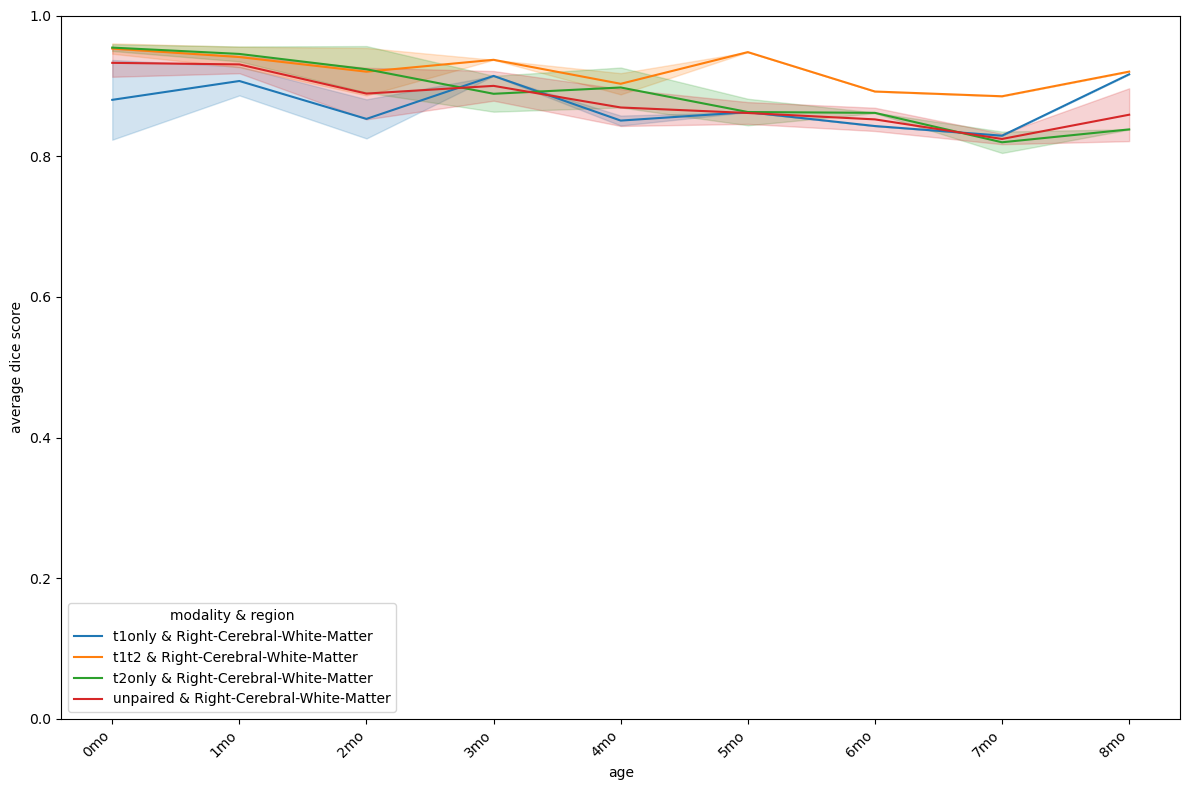

In [31]:
if df_for_plot is not None:
    
    colors = list(mcolors.TABLEAU_COLORS.values())
    color_values = {}
    for i, (modality, region) in enumerate(df_for_plot.groupby(['modality', 'region']).groups.keys()):
        color_values[f"{modality} & {region}"] = colors[i % len(colors)]
    # Create the plot
    plt.figure(figsize=(12, 8))
        
    for (modality, region), group in df_for_plot.groupby(['modality', 'region']):
        color_key = f"{modality} & {region}"
        color = color_values.get(color_key, 'gray')
        label = color_key
        plt.plot('age', 'dice_mean', data=group, color=color, label=label)
        plt.fill_between('age', 'ci_lower', 'ci_upper', data=group, color=color, alpha=0.2)
    
    plt.xlabel('age')
    plt.ylabel('average dice score')
    ax = plt.gca()
    ax.set_ylim([0,1])
    #plt.title('average dice score by age for modality/region')
    plt.xticks(rotation=45, ha='right')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    sorted_labels = sorted(by_label.keys(), key=lambda x: x)
    sorted_handles = [by_label[label] for label in sorted_labels]
    sorted_labels = sorted_labels
    plt.legend(sorted_handles, sorted_labels, title="modality & region")
    
    plt.tight_layout()
    plt.savefig('/users/1/lundq163/rwm.png', dpi=300, bbox_inches='tight')
    plt.show()